# Assignment 3: Latent Manifold and Regression

## Team: White Walkers

### Student Names:

-  Pratik Dhumal (SJSU ID: 012457185)
-  Sourabh Namilikonda (SJSU ID: 012414948)
-  Hrishikesh Rendalkar (SJSU ID: 011485994)
-  Hemambujam Veeraraghavan (SJSU ID: 012482392)


#### Business Objective:
Being software engineers, we develop a number of mobile applications. We wanted to get an insight on the kind of application that are present in the market and work towards an application that would be suitable and useful for the consumers. Hence we decided to gather data on the the available applications in the play store, and perform data analysis on these applications and the user reviews.

#### Dataset:

The Playstore dataset we have chosen for this assignment holds data with regards to user ratings, reviews, size, number of installs and the price of the applications. This dataset had ample data, with about 4000 sample data, which served to be useful for the K-Means clustering. 

#### Data Wrangling:
Using data from the above-mentioned dataset, we converted data from a plain text format to a list of lists in Python, that can be used for our assignment purpose.

#### Data Preparation:
Using the NumPy library in python, the data was prepped and plotted into an image for the prepared dataset before performing K-means clustering, just to ensure we could choose the right K value.
 
#### Data Interpretation:
With the cleaned datset, We are trying to find correlation between the above mentioned fields on the dataset. this correleation  helped us to decide on the major facctors that plays a key role in its popularity. For instance, We have a category and genre feature which will help us identify the most popular apps in that category.
We plan to combine this dataset with the user reviews data set to get the sentiment analysis for a particular app and compare with the number of installs.

#### Future Enhancements:

In Future, we want to compare the apps from this playstore(Google) to other playstores(Apple) to get app popularity among different platforms and devices

In [137]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0, 10.0)
os.chdir("N:\\")
data = pd.read_csv("googleplaystore.csv")
#data = pd.read_excel('12febtvt.xls', sheetname='Page 2')
#data=pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
print(data.shape)
data.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


#### The above output displays the dataset from a local csv file that we downloaded and describing the structure of the dataset

In [138]:
#data purification
data['Rating'].fillna(0, inplace = True)

def purify_rating(X):
    for ind,s in enumerate(X):
        if s>5:
            print(ind, s)
            X[ind]=s/10
    return X

def purify_price(s):
    s=s.replace("Everyone","0")
    return s.replace("$","")

def purify_installs(s):
    s=s.replace("+","")
    s=s.replace("Free","0")
    return s.replace(",","")

def purify_size(s):
    s=s.replace(",","")
    s=s.replace("+","")
    s=s.replace("M","")
    s=s.replace("k","")
    return s.replace("Varies with device","0")

#### Here we are preparing the data by:
- Manual analysis of dataset
- Removal of NaN values and replacing by a mean default value
- Next defining functions for removal of outlier data and symbols to get numeric features

4751680.03865 -1745830.82948
6.0 -1.0


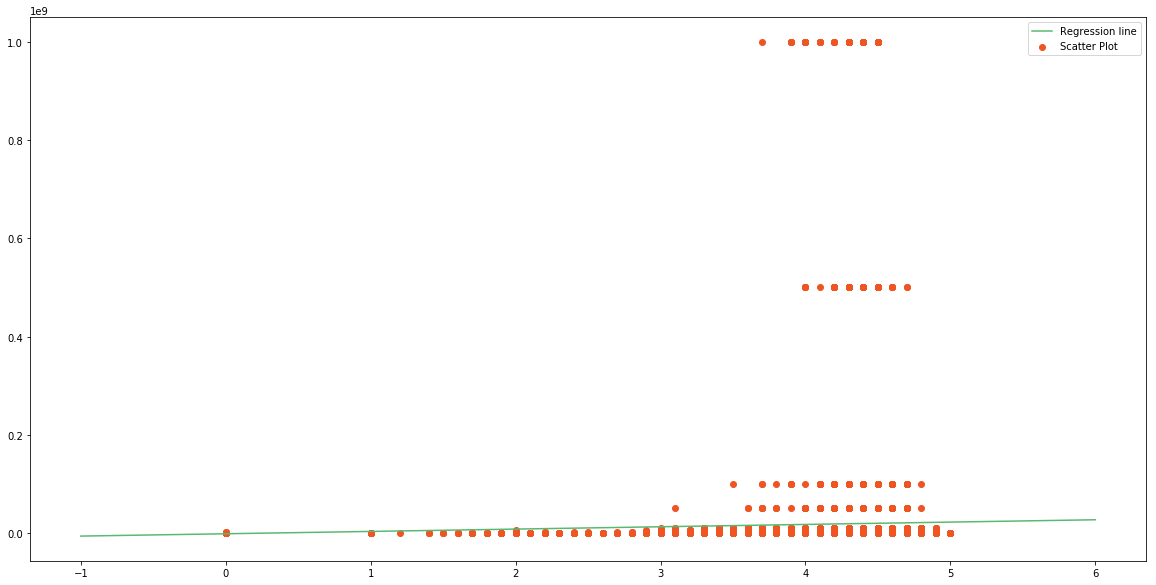

In [139]:
X = data['Rating'].values
Y = data['Installs'].values

X = purify_rating(X)
X = list(map(float, X))
Y = [purify_installs(s) for s in Y]
Y = list(map(float, Y))

# linear regression algorithm
mean_x=np.mean(X)
mean_y=np.mean(Y)
n=len(X)
number=0
denom=0
for i in range(n):
    number+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=number/denom
b0=mean_y-(b1*mean_x)

#printing slope and coefficient
print(b1,b0)
max_x=np.max(X)+1
min_x=np.min(X)-1
print(max_x,min_x)
x=np.linspace(min_x,max_x,100)
y=b0+b1*x

#plotting the linear regression line and the actual data points
plt.plot(x,y,color='#58b970',label='Regression line')
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')
plt.legend()
plt.show()

#### Now we select individual columns, purify them and use the manual algorithm to plot the graph along with its linear regression
##### Plotting Application Rating vs No of Installs

In [140]:
#manually finding the r2 score
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

#comparing manual score with sklearn library to verify
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = np.array(X)
X = X.reshape((n, 1))
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)
r2_score=reg.score(X,Y)
print(r2_score)

0.00716443291625


##### Plotting Application Price vs No of Installs

-62311.8759352 15526923.8342
-62311.8759352 15526923.8342
401.0 -1.0


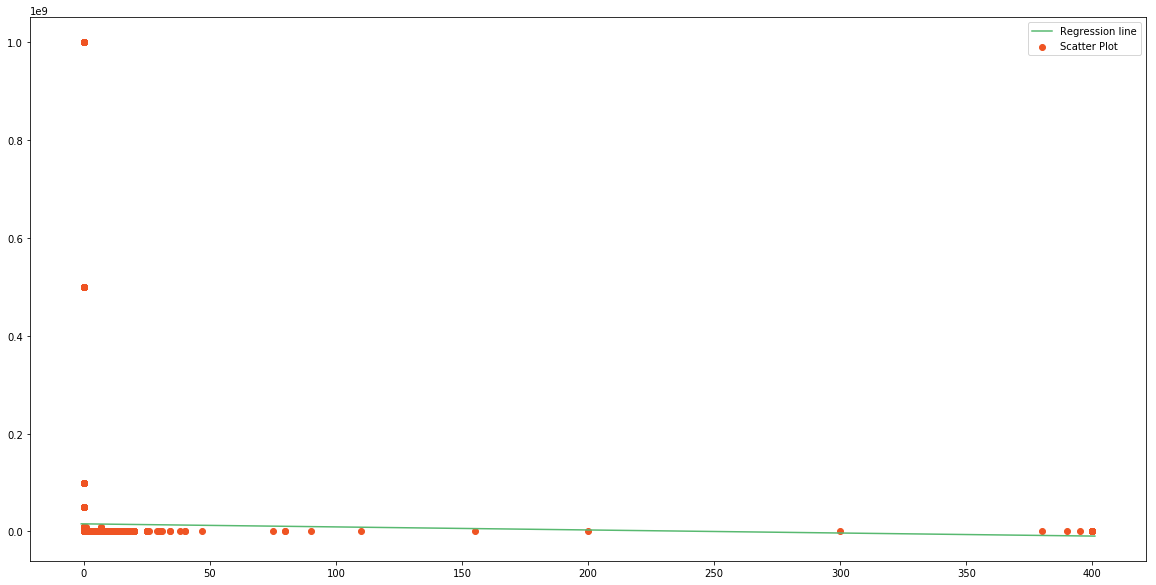

In [142]:
X = data['Price'].values
Y = data['Installs'].values

X = [purify_price(s) for s in X]
X = list(map(float, X))
Y = [purify_installs(s) for s in Y]
Y = list(map(float, Y))

# linear regression algorithm
mean_x=np.mean(X)
mean_y=np.mean(Y)
n=len(X)
number=0
denom=0
for i in range(n):
    number+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=number/denom
b0=mean_y-(b1*mean_x)

#printing slope and coefficient
print(b1,b0)

#printing slope and coefficient
print(b1,b0)
max_x=np.max(X)+1
min_x=np.min(X)-1
print(max_x,min_x)
x=np.linspace(min_x,max_x,100)
y=b0+b1*x

#plotting the linear regression line and the actual data points
plt.plot(x,y,color='#58b970',label='Regression line')
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')
plt.legend()
plt.show()

In [146]:
#manually finding the r2 score
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)
#comparing manual score with sklearn library to verify
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = np.array(X)
X=X.reshape((n,1))
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)
r2_score=reg.score(X,Y)
print(r2_score)

0.000683038969024
0.000683038968991


##### Plotting Application Size vs No of Installs

-24205.991622 16219150.6892
-24205.991622 16219150.6892
1021.0 -1.0


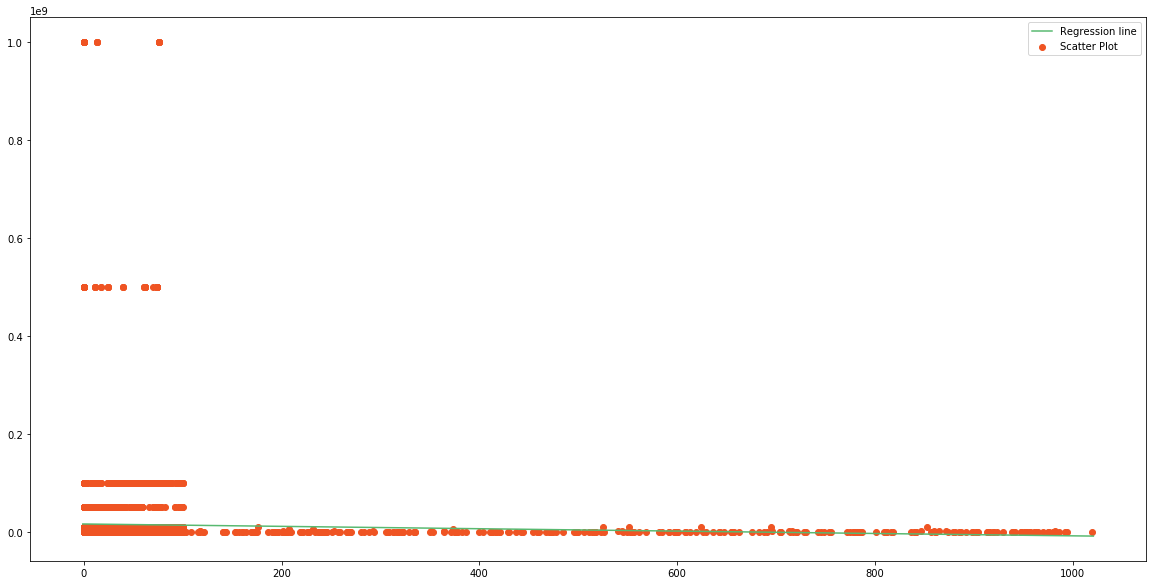

In [145]:
X = data['Size'].values
Y = data['Installs'].values

X = [purify_size(s) for s in X]
X = list(map(float, X))
Y = [purify_installs(s) for s in Y]
Y = list(map(float, Y))

# linear regression algorithm
mean_x=np.mean(X)
mean_y=np.mean(Y)
n=len(X)
number=0
denom=0
for i in range(n):
    number+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=number/denom
b0=mean_y-(b1*mean_x)

#printing slope and coefficient
print(b1,b0)

#printing slope and coefficient
print(b1,b0)
max_x=np.max(X)+1
min_x=np.min(X)-1
print(max_x,min_x)
x=np.linspace(min_x,max_x,100)
y=b0+b1*x

#plotting the linear regression line and the actual data points
plt.plot(x,y,color='#58b970',label='Regression line')
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')
plt.legend()
plt.show()

In [147]:
#manually finding the r2 score
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

#comparing manual score with sklearn library to verify
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = np.array(X)
X = X.reshape((n, 1))
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)
r2_score=reg.score(X,Y)
print(r2_score)

[ 0.00068304]
0.000683038968991


### Observations:
- We observed that the application size and price were inversely proportional to number of installs
- For latent manifold, we use size, price as inverses and in combination with sentiment analysis to predict the number of installs and further the popularity of the app.
- We can also think of the category as latent variable as apps in some categories will be installed more frequetly than the other.
- Words in customer reviews can also be a important factor in determinig the popularity.